<a href="https://colab.research.google.com/github/B4Farouk/smpl-dr-clip/blob/main/simpledCLIP3_latexplots_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies


### torch, torchvision

In [8]:
# install torch and torchvision
!pip3 install torch torchvision torchaudio torchtext --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


### pytorch3d

In [9]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.12.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  404k    0  404k    0     0   586k      0 --:--:-- --:--:-- --:--:-- 5373k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision stable) to /tmp/pip-req-build-0biwh0zj
  Running command git clone -q https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-0biwh0zj
  Running command git checkout -q 995b60e3b99faa1ee1bcdbe244426d54d98a7242
  Using cached fvcore-0.1.5.post20221213.tar.gz (50 kB)
  Using cached iopath-0.1.10.tar.gz (42 kB)
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
  Using cached portalocker-2.6.0-py2.py3-none-any.whl (15 kB)
  Created wheel for pytorch3d: filename=pytorch3d-0.7.1-cp38-cp38-linux_x86_

In [10]:
import pytorch3d
pytorch3d.__version__

'0.7.1'

### SMPL / Meshes

In [11]:
!pip install smplpytorch
!pip install chumpy
!pip install trimesh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.2 MB/s 
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58286 sha256=818d20a490e8c8b36007922378e6e28a2d03909a2597f2c54de2fccc2839d617
  Stored in directory: /root/.cache/pip/wheels/d9/a2/b8/b8aeeeaeb01b5002085156add1aed832f2fb03e79d0f22dfed
Successfully built chumpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 669 kB 17.3 MB/s 


### CLIP

In [12]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-rv_e90gp
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-rv_e90gp
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369408 sha256=17ad7a7ed8c2068316077c50f86ae69266acc4b24bc5f7cd6ff1e4d1b68bf812
  Stored in directory: /tmp/pip-ephem-wheel-cache-m2tqonrh/wheels/ab/4f/3a/5e51521b55997aa6f0690e095c08824219753128ce8d9969a3
Successfully built clip


### LATEX

In [13]:
!sudo apt-get install texlive-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  aglfn asymptote asymptote-doc biber chktex cm-super cm-super-minimal context
  context-modules dvidvi dvipng emacsen-common feynmf fonts-adf-accanthis
  fonts-adf-berenis fonts-adf-gillius fonts-adf-universalis
  fonts-arphic-bkai00mp fonts-arphic-bsmi00lp fonts-arphic-gbsn00lp
  fonts-arphic-gkai00mp fonts-baekmuk fonts-cabin fonts-comfortaa
  fonts-croscore fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu-core fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-baskerville
  fonts-gfs-bodoni-classic fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-didot-classic fonts-g

## GPU

In [14]:
import torch

torch.cuda.is_available()

True

In [15]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [16]:
# GPU or CPU
gpu, cpu = None, None
if torch.cuda.is_available():
    gpu = torch.device("cuda:0")
    torch.cuda.set_device(gpu)
else:
    cpu = torch.device("cpu")
dev = gpu if gpu is not None else cpu
dev

device(type='cuda', index=0)

## Setup

### Codebase Loading

In [17]:
!rm -rf project #remove if it already exists 
!git clone https://github.com/B4Farouk/smpl-dr-clip project
!rm -rf sample_data

Cloning into 'project'...
remote: Enumerating objects: 864, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 864 (delta 136), reused 207 (delta 114), pack-reused 622
Receiving objects: 100% (864/864), 78.63 MiB | 17.27 MiB/s, done.
Resolving deltas: 100% (504/504), done.


### Local Imports 

In [18]:
from project.aux_functions import *

from project.smpl import SMPLwrapper, mesh_from
from project.textures import TexturesFactory
from project.rendering import CamerasFactory, Renderer
from project.clipwrapper import CLIPwrapper

from project.optimization import OptimEnv, OptimConfig, TrackerConfig, init_weights
from project.model import compose, SimpledCLIPContext

import trimesh

import clip

import numpy as np

from torch.nn.functional import cosine_similarity

%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.8/dist-packages/smplpytorch/pytorch/smpl_layer.py:41: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  torch.Tensor(smpl_data['betas'].r).unsqueeze(0))


## Test: SMPL and Rendering

In [20]:
# initalize a textures factory
txfactory = TexturesFactory(device=dev)
colored_reference_SMPL = trimesh.load("project/SMPL_female_with_colors.obj", process=False)
# use the texture factory to create a texture generator: a function that takes faces and creates a texture
def texture_generator(verts,faces):
  return txfactory.from_image(colored_reference_SMPL ,verts, faces)
def grey_texture_generator(verts,faces):
  nfaces = len(faces[0])
  texture = txfactory.from_facecolor(nfaces=nfaces, facecolor=(0.5, 0.5, 0.5))
  return texture
# pose and shape initalization
pose_vect = torch.zeros((1, 72), device=dev) # theta, used in optimization
shape_vect = torch.ones((1, 10), device=dev) # beta, not used in optimization
# create the smpl model
smpl_model_grey = SMPLwrapper(model=None, batchsize=1, txmapping=grey_texture_generator, device=dev) #model=None uses the default model
smpl_model_texture = SMPLwrapper(model=None, batchsize=1, txmapping=texture_generator, device=dev)
# create the mesh


In [21]:
# create a cameras factory
camsfactory = CamerasFactory(device=dev)
# cameras' spherical coordinates
radiuses = 2.25
azimuths = 0
elevations = 5
coords = (radiuses, azimuths, elevations)
# create cameras using cameras factory
cameras = camsfactory.fov_persp_scs(coords=coords, fov=60, frustrum_depth=(0.1, 100))
# create a renderer
renderer = Renderer(device=dev, cameras=cameras)


## Test: CLIP

In [22]:
clip_model = CLIPwrapper(model_name="ViT-B/32", device=dev)

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 69.6MiB/s]


#### Test: How much does CLIP recognize our mesh and the position it is in ?

## Prompts

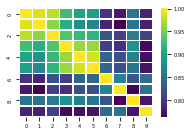

In [23]:
BASE_PROMPT_grey = "a grey person wearing a grey T-shirt and grey pants. The background is white."
BASE_PROMPT_texture = "a white human wearing a light grey T-shirt and blue pants, standing up on her straight feet. She is looking upfront with both hands apart and at the shoulder level."
POSE_DESCS = [
    # set 1
    "She is looking upfront and is standing up straight with both feet and hands flat. Both her arms are straight and symmetrically apart from each other while at the shoulders' level.",
    "Both her arms are straight and symmetrically apart from each other at the shoulders' level. She is looking upfront and is standing up straight, with both feet and hands flat.",
    # set 2
    "She is looking upfront and is standing up straight with both feet and hands flat. Both her arms are straight above her head.",
    "She is standing up straight on her flat feet. She is looking upfront while grabbing her hips with both hands.",
    "She is standing up on her flat feet and leaning backwards.",
    "She is standing up straight on her flat feet.",
    # set 3
    "She is sitting.",
    "She is running",
    "She is bowing forward with both her hands flat on her thighs and her face facing the ground.",
    # control
    ""
]

TEST_PMTS_grey = [BASE_PROMPT_grey+desc for desc in POSE_DESCS]
TEST_PMTS_texture = [BASE_PROMPT_texture+desc for desc in POSE_DESCS]
N_TEST_PMTS = len(POSE_DESCS)

test_pmts_sim_matrix = np.zeros((N_TEST_PMTS, N_TEST_PMTS))
for i in range(N_TEST_PMTS):
  ref = clip_model.pmt_emb(POSE_DESCS[i])
  for j in range(N_TEST_PMTS):
    test_pmts_sim_matrix[i, j] = cosine_similarity(clip_model.pmt_emb(POSE_DESCS[j]), ref)

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sns.heatmap(test_pmts_sim_matrix, linewidth=0.5, ax=ax, cmap="viridis").collections[0].colorbar.ax.tick_params(labelsize=5)
ax.tick_params(labelsize=5)

In [24]:
save_for_latex(fig, "prompt_heatmap")

## MODELS


In [25]:
# create a model factory
model_context_grey = SimpledCLIPContext(smpl_model_grey, renderer, clip_model)
model_context_texture = SimpledCLIPContext(smpl_model_texture, renderer, clip_model)
MODELS_grey = [model_context_grey.get_model(prompt=pmt) for pmt in TEST_PMTS_grey]
MODELS_texture = [model_context_texture.get_model(prompt=pmt) for pmt in TEST_PMTS_texture]

### Optimization

In [26]:
INNER_PRODUCT_LOSS = lambda imgs_embs, pmt_emb: 1e-3 * (imgs_embs**2).sum(dim=1, keepdim=True) -  imgs_embs @ pmt_emb.T

def run_optimization(model, loss_mode, loss_fn=None, n_passes=1000, gradmask=None):
  # configs
  trackerconfig = TrackerConfig()
  if loss_fn is None: # use default loss function: cosine distance
    optimconfig = OptimConfig(loss_mode=loss_mode)
  else:
    optimconfig = OptimConfig(loss_mode=loss_mode, loss_fn=loss_fn)
  # weights used in optimization
  pose, shape = init_weights(device=dev)
  # optimize with respect to the pose only
  optimenv = OptimEnv(model=model, weights=[pose], config=optimconfig) 
  result = optimenv.optimize(pose=pose, shape=shape, n_passes=n_passes, trackerconfig=trackerconfig, gradmask=gradmask)
  return result


def intermediate_views(result, coords):
  visu_smpl_model = SMPLwrapper(model=None, batchsize=1, txmapping=texture_generator, device=dev) #model=None uses the default model
  visu_camera = camsfactory.fov_persp_scs(coords=coords, fov=60, frustrum_depth=(1, 100))
  visu_renderer = Renderer(cameras=visu_camera, device=dev)
  
  pose_shape = zip(result["tracked"]["poses"]["pose"], result["tracked"]["shapes"]["shape"])
  for pose, shape in pose_shape:
    pose, shape = pose.to(dev), shape.to(dev)
    mesh = visu_smpl_model.meshes(theta=pose, beta=shape)
    image = visu_renderer.render(mesh)
    plot_image_t(image.squeeze())

def best_intermediate_result(result):
  best = {}

  minloss = result["tracked"]["losses"]["loss"].min()
  best_loss_entry = result["tracked"]["losses"].query("loss == @minloss")
 
  best["loss"] = minloss
  best["pass"] = best_loss_entry["pass"].values[0]
  best["pose"] = result["tracked"]["poses"].iloc[best_loss_entry.index[0]]["pose"]
  
  return best

### Results

In [27]:
p2_grey= run_optimization(model=MODELS_grey[2], n_passes=1000, loss_mode="average-loss-on-embeddings")

In [28]:
p2_texture = run_optimization(model=MODELS_texture[2], n_passes=1000, loss_mode="average-loss-on-embeddings")

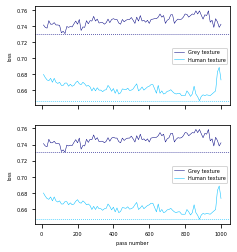

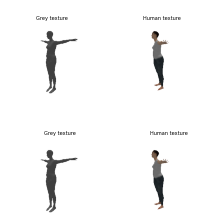

In [35]:
fig1, (loss_ax1, loss_ax2) = plt.subplots(2, 1, figsize=(3.5, 4), sharex=True)
fig2, pose_axs = plt.subplots(2, 2, figsize=(3.5, 4), sharex=True, sharey=True)
pose_axs1, pose_axs2 = pose_axs.reshape(2, 2)


coords = (2.25, 60, 5)
plot_smpl_model = SMPLwrapper(model=None, batchsize=1, txmapping=texture_generator, device=dev) #model=None uses the default model
grey_plot_smpl_model = SMPLwrapper(model=None, batchsize=1, txmapping=grey_texture_generator, device=dev)
plot_camera     = camsfactory.fov_persp_scs(coords=coords, fov=60, frustrum_depth=(0.1, 100))
plot_renderer   = Renderer(cameras=plot_camera, device=dev)

results_list = [p2_grey, p2_texture]
labels_list = ["Grey texture", "Human texture"]
colors_list = ["navy", "deepskyblue"]

for result, label, color, pose_ax in zip(results_list, labels_list, colors_list, pose_axs1):
    best = best_intermediate_result(result)
    # loss
    sns.lineplot(data=result["tracked"]["losses"], x="pass", y="loss", ax=loss_ax1, label=label, color=color, linewidth=0.5)
    loss_ax1.axhline(y=best["loss"], color=color, ls=":", linewidth=0.75)
    loss_ax1.tick_params(labelsize=5)
    loss_ax1.set_xlabel("pass number", size=5)
    loss_ax1.set_ylabel("loss", size=5)
    loss_ax1.legend(prop={"size": 5})
    # pose
    pose, shape = best["pose"].to(dev), torch.ones((1, 10), device=dev)
    if label=='Grey texture':
      mesh = grey_plot_smpl_model.meshes(theta=pose, beta=shape)
    else:
      mesh = plot_smpl_model.meshes(theta=pose, beta=shape)
    img = plot_renderer.render(mesh)
    pose_ax.imshow(img.cpu().squeeze())
    pose_ax.axis("off")
    pose_ax.text(80, 35, label, fontsize=5)
    



for result, label, color, pose_ax in zip(results_list, labels_list, colors_list, pose_axs2):
    best = best_intermediate_result(result)
    # loss
    sns.lineplot(data=result["tracked"]["losses"], x="pass", y="loss", ax=loss_ax2, label=label, color=color, linewidth=0.5)
    loss_ax2.axhline(y=best["loss"], color=color, ls=":", linewidth=0.75)
    loss_ax2.tick_params(labelsize=5)
    loss_ax2.set_xlabel("pass number", size=5)
    loss_ax2.set_ylabel("loss", size=5)
    loss_ax2.legend(prop={"size": 5})
    #pose
    pose, shape = best["pose"].to(dev), torch.ones((1, 10), device=dev)
    if label=='Grey texture':
      mesh = grey_plot_smpl_model.meshes(theta=pose, beta=shape)
    else:
      mesh = plot_smpl_model.meshes(theta=pose, beta=shape)
    img = plot_renderer.render(mesh)
    pose_ax.imshow(img.cpu().squeeze())
    pose_ax.axis("off")
    pose_ax.text(100, 25, label, fontsize=5)


In [36]:
save_for_latex(fig1, "tx_5cams_losses")

In [37]:
save_for_latex(fig2, "tx_5cams_poses_4")

In [ ]:
MASK_BODY_BOTTOM_HALF_GRAD_UPDATES = torch.zeros((1, 72), device=dev)
MASK_BODY_BOTTOM_HALF_GRAD_UPDATES[:,12*3:] = 1

In [ ]:
p2_iploss_aloe = run_optimization(model=MODELS[2], loss_fn=INNER_PRODUCT_LOSS, n_passes=1000, loss_mode="average-loss-on-embeddings",
                                  gradmask=MASK_BODY_BOTTOM_HALF_GRAD_UPDATES)

In [ ]:
p2_iploss_loae = run_optimization(model=MODELS[2], loss_fn=INNER_PRODUCT_LOSS, n_passes=1000, loss_mode="loss-on-average-embedding", 
                                  gradmask=MASK_BODY_BOTTOM_HALF_GRAD_UPDATES)

In [ ]:
p2_cosloss_aloe = run_optimization(model=MODELS[2], n_passes=1000, loss_mode="average-loss-on-embeddings", 
                                  gradmask=MASK_BODY_BOTTOM_HALF_GRAD_UPDATES)

In [ ]:
p2_cosloss_loae = run_optimization(model=MODELS[2], n_passes=1000, loss_mode="loss-on-average-embedding",
                                   gradmask=MASK_BODY_BOTTOM_HALF_GRAD_UPDATES)

In [ ]:
figa, pose_axs = plt.subplots(2, 2, figsize=(3.5, 4), sharex=True, sharey=True)
figb, (loss_ax1, loss_ax2) = plt.subplots(2, 1, figsize=(3.5, 4), sharex=True)
pose_axs1, pose_axs2 = pose_axs.reshape(2, 2)

coords = (2.25, 55, 5)
plot_smpl_model = SMPLwrapper(model=None, batchsize=1, txmapping=texture_generator, device=dev) #model=None uses the default model
plot_camera     = camsfactory.fov_persp_scs(coords=coords, fov=60, frustrum_depth=(0.1, 100))
plot_renderer   = Renderer(cameras=plot_camera, device=dev)

results_list = [p2_iploss_aloe, p2_iploss_loae]
labels_list = ["Inner Product ALoE", "Inner Product LoAE"]
colors_list = ["navy", "deepskyblue"]

for result, label, color, pose_ax in zip(results_list, labels_list, colors_list, pose_axs1):
    best = best_intermediate_result(result)
    # loss
    sns.lineplot(data=result["tracked"]["losses"], x="pass", y="loss", ax=loss_ax1, label=label, color=color, linewidth=0.5)
    loss_ax1.axhline(y=best["loss"], color=color, ls=":", linewidth=0.75)
    loss_ax1.tick_params(labelsize=5)
    loss_ax1.set_xlabel("pass number", size=5)
    loss_ax1.set_ylabel("loss", size=5)
    loss_ax1.legend(prop={"size": 5})
    # pose
    pose, shape = best["pose"].to(dev), torch.ones((1, 10), device=dev)
    mesh = plot_smpl_model.meshes(theta=pose, beta=shape)
    img = plot_renderer.render(mesh)
    pose_ax.imshow(img.cpu().squeeze())
    pose_ax.axis("off")
    pose_ax.text(70, 35, label, fontsize=5)
    

results_list = [p2_cosloss_aloe, p2_cosloss_loae]
labels_list = ["Cosine ALoE", "Cosine LoAE"]
colors_list = ["darkgreen", "lime"]

for result, label, color, pose_ax in zip(results_list, labels_list, colors_list, pose_axs2):
    best = best_intermediate_result(result)
    # loss
    sns.lineplot(data=result["tracked"]["losses"], x="pass", y="loss", ax=loss_ax2, label=label, color=color, linewidth=0.5)
    loss_ax2.axhline(y=best["loss"], color=color, ls=":", linewidth=0.75)
    loss_ax2.tick_params(labelsize=5)
    loss_ax2.set_xlabel("pass number", size=5)
    loss_ax2.set_ylabel("loss", size=5)
    loss_ax2.legend(prop={"size": 5})
    #pose
    pose, shape = best["pose"].to(dev), torch.ones((1, 10), device=dev)
    mesh = plot_smpl_model.meshes(theta=pose, beta=shape)
    img = plot_renderer.render(mesh)
    pose_ax.imshow(img.cpu().squeeze())
    pose_ax.axis("off")
    pose_ax.text(85, 35, label, fontsize=5)

In [ ]:
import matplotlib as mpl
mpl.use("pgf")
figa.savefig("tx_5cams_poses_fixlowerbody.pgf", dpi=400, bbox_inches="tight")

In [ ]:
import matplotlib as mpl
mpl.use("pgf")
figb.savefig("tx_5cams_losses_fixlowerbody.pgf", dpi=400, bbox_inches="tight")